In [4]:
# need cpu, hand recognition on oip.jpg
!pip install mediapipe opencv-python

In [2]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

Saving OIP.jpg to OIP.jpg


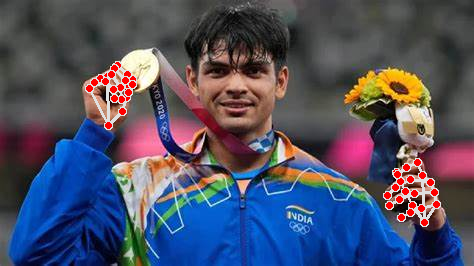

In [3]:
# Load MediaPipe Hand module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
'''
mp.solutions.hands: Loads MediaPipe's hand tracking module.
mp_hands.Hands(...): Creates a hand detection model with parameters:
static_image_mode=True:
True → Processes each image independently (better for images).
False → Uses tracking to improve hand detection in a video.
max_num_hands=2: Detects up to 2 hands in an image.
min_detection_confidence=0.5:
0.5 (50%) means the model must be at least 50% confident before detecting a hand.
Higher values → Fewer false positives but may miss hands.
Lower values → More false positives but may detect more hands.
'''

# Load an image
from google.colab import files
uploaded = files.upload()  # Upload an image
img_path = list(uploaded.keys())[0]  # Get uploaded file name
'''
files.upload(): Opens a file dialog to upload an image from your computer.
uploaded.keys() returns a dictionary of uploaded files.
img_path = list(uploaded.keys())[0]: Extracts the first uploaded file's name.

'''

# Read and process image
image = cv2.imread(img_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = hands.process(rgb_image)
'''
cv2.imread(img_path): Loads the image in BGR format (default for OpenCV).
cv2.cvtColor(image, cv2.COLOR_BGR2RGB): Converts BGR to RGB (MediaPipe uses RGB).
hands.process(rgb_image):
Processes the image and detects hand landmarks.
The result is stored in results.
'''

# Draw landmarks
mp_draw = mp.solutions.drawing_utils
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_draw.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

'''
mp.solutions.drawing_utils: Loads drawing utilities to visualize keypoints.
if results.multi_hand_landmarks:
Checks if hand landmarks were detected.
for hand_landmarks in results.multi_hand_landmarks:
Loops through each detected hand.
mp_draw.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS):
Draws dots and lines connecting key hand points.

'''
# Display output
cv2_imshow(image)
'''
cv2_imshow(image):
Displays the image in Google Colab (since cv2.imshow() does not work in Colab).
'''

Saving m.jpg to m.jpg


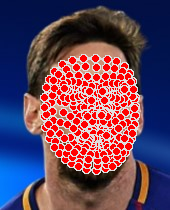

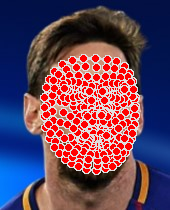

In [7]:
# Load MediaPipe Face Mesh module on oip.jpg
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

# Upload an image
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]  # Get uploaded file name

# Read image
image = cv2.imread(img_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image
results = face_mesh.process(rgb_image)
'''
# Draw landmarks on the image
mp_draw = mp.solutions.drawing_utils
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        mp_draw.draw_landmarks(image, face_landmarks, mp_face_mesh.FACEMESH_TESSELATION)
'''
# Draw only facial contours (better visibility)
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        mp_draw.draw_landmarks(image, face_landmarks, mp_face_mesh.FACEMESH_CONTOURS)  # Use contours instead of tessellation

cv2_imshow(image)


# Display output
cv2_imshow(image)
